## Task 2- To Explore Supervised Machine Learning
### What will be predicted score if a student study for 9.25 hrs in a day?
###                                                                                                                                               By :-  Kailash Singh rautela

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing Datasets

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking Na's

In [3]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Correlation Table

In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


97.61 % correlation between Hours & Scores that means the both variables holds strong relation.

### Scatter plot

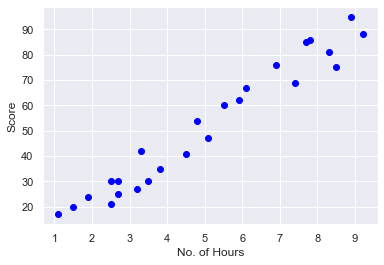

In [5]:
plt.scatter(data['Hours'],data['Scores'],c = 'blue')
plt.xlabel('No. of Hours')
plt.ylabel('Score')
plt.show()

Linear trend is spotted i.e. no Feature scaling is required

### Defining Dependent & Independent Terms

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

### Train test split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/5, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


## Linear Model

In [8]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
reg = mdl.fit(x_train,y_train)
reg

LinearRegression()

### Comapring Predicted & Orignal Scores

In [9]:
pred = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': reg.predict(x_test).round(2)})  
pred

,Actual Score,Predicted Score
0,20,16.88
1,27,33.73
2,69,75.36
3,30,26.79
4,62,60.49


### Plotting Regression line

#### Regression Line

In [10]:
print('y_hat', '=', reg.coef_,'x','+',reg.intercept_ )

y_hat = [9.91065648] x + 2.0181600414346974


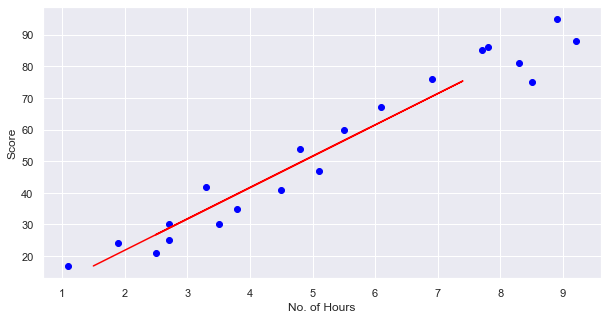

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train,c = 'blue')
plt.plot(x_test,reg.predict(x_test), c = 'red')
plt.xlabel('No. of Hours')
plt.ylabel('Score')
plt.show()

### Performance Measures

### R - squared 

In [12]:
reg.score(x_train,y_train)

0.9515510725211552

### Adjusted R - squared

In [13]:
1 - (1 - reg.score(x_train,y_train))*((x_train.shape[0] - 1)/(x_train.shape[0] - x_train.shape[1] - 1))

0.9488594654389972

##### Both values are above 90 %, Therefore we can say that our model is 95 % accurate

### Predecting for 9.25 hour

In [14]:
reg.predict(np.array(9.25).reshape(-1,1)).round(3)

array([93.692])